In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import numpy as np
import seaborn as sns
import torch
from matplotlib import pyplot as plt
from taskchain.task import Config

from rcpl import config

matplotlib.rc('text', usetex=True)
plt.rc('text.latex', preamble=r"\usepackage{amsmath}")
DEVICE = 'cuda'

In [3]:
config_path = config.CONFIGS_DIR / 'model' / 'random' / 'gru3-custom' / 'gru6.yaml'
conf = Config(
    config.TASKS_DIR,  # where Taskchain data should be stored
    config_path,
    context={'device': DEVICE},
    global_vars=config,  # set global variables
)
chain = conf.chain()
chain.set_log_level('CRITICAL')

In [4]:
validate_crlb = chain.validate_crlb.value['2023-08-27']

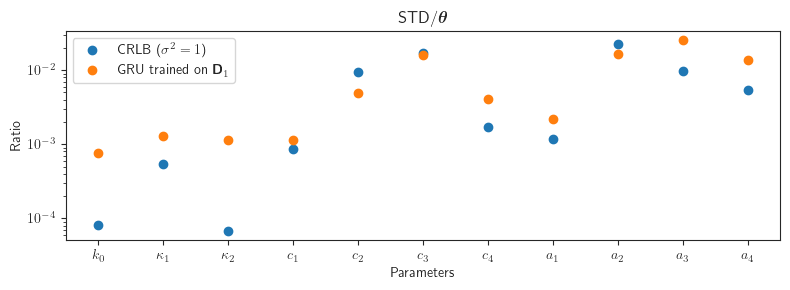

In [5]:
with sns.axes_style('ticks'):
    with torch.no_grad():
        labels = ['k_0', '\kappa_1', '\kappa_2', 'c_1', 'c_2', 'c_3','c_4', 'a_1', 'a_2', 'a_3','a_4']

        plt.figure(figsize=(8, 3))
        #points_a = validate_crlb['crlb']['relative_std']
        #plt.plot(points_a, 'o', label=r'CRLB ($\sigma^2=1$)')
        points_a = np.array(validate_crlb['crlb']['relative_std']) / 100
        plt.plot(points_a, 'o', label=r'CRLB ($\sigma^2=1$)')
        
        #plt.plot(validate_crlb['theta_relative_std'], 'o', label=r'GRU trained on $\textbf{D}_1$')
        plt.plot(validate_crlb['theta_relative_std'], 'o', label=r'GRU trained on $\textbf{D}_1$')

        plt.yscale('log')
        plt.title(r'STD/$\boldsymbol\theta$')

        plt.xticks(ticks=range(len(labels)), labels=[f'${i}$' for i in labels]) 
        plt.xlabel('Parameters')
        plt.ylabel('Ratio')
        plt.legend()
        plt.tight_layout()
        #plt.savefig('crlb.pdf', bbox_inches='tight', pad_inches=0)
        plt.plot()